# A transformada discreta de Fourier (DFT)

## Caso unidimensional

Transformada Discreta de Fourier em uma dimensão:

- Entrada: $f(x)$ - $x$ coordenada dos pixels da imagem
- Saída: $F(u)$ - $u$ frequência normalizada, número de ciclos na amostra

$$ F(u) = \sum_{x=0}^{N-1}f(x)\exp(-j2\pi(\frac{ux}{N})) $$

$$ 0 \leq x < N, 0 \leq u < N $$    

## Caso bidimensional

Transformada Discreta de Fourier em duas dimensões:

- Entrada: $f(x,y)$ - $(x,y)$ coordenada dos pixels da imagem
- Saída: $F(u,v)$ - $(u,v)$ frequência normalizada, número de ciclos na amostra

$$ F(u,v) = \sum_{x=0}^{N-1}\sum_{y=0}^{M-1}f(x,y)\exp(-j2\pi(\frac{ux}{N}+ \frac{vy}{M})) $$

$$ 0 \leq x < N , 0 \leq u < M $$   
$$ 0 \leq y < M , 0 \leq v < M $$   

### Significado de $u$ na equação

Dado $N$ amostras, o $u$ na equação $ \exp(-j{2\pi}\frac{ux}{N}) $ indica o número de ciclos no espaço de $0$ a $N-1$. O período, em pixels, deste sinal é $\frac{N}{u}$. O período máximo é $N$ e período mínimo é 2.


## 1. Exemplo unidimensional

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from numpy.fft import *
import sys,os
ia898path = os.path.abspath('../../')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898.src as ia

Para exemplificar o caso unidimensional, vamos pegar uma imagem bidimensional (cameraman) e escolher apenas uma linha da imagem para ser nossa função unidimensional.

comparando g1 e f1: 9.07374046808e-14


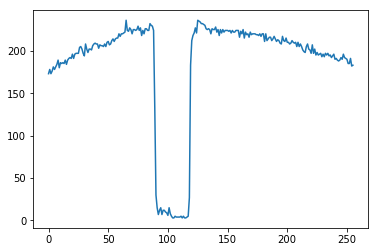

In [20]:
f1 = mpimg.imread('../data/cameraman.tif')[10,:]
plt.plot(f1)
F1 = fft(f1)
g1 = ifft(F1)
print ('comparando g1 e f1:', abs(g1-f1).max())

## 2. Exemplo bidimensional

comparando g2 e f2: 2.00766278498e-13


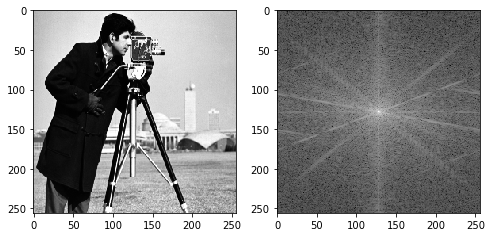

In [36]:
f2 = mpimg.imread('../data/cameraman.tif')

F2 = fft2(f2)
g2 = ifft2(F2)
print ('comparando g2 e f2:', abs(g2-f2).max())
plt.figure(1, figsize=(8,8))

plt.subplot(1,2,1)
plt.imshow(f2, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(ia.dftview(F2), cmap='gray')

## Propriedades da DFT

### 1. Periodicidade

A transformada discreta de Fourier e sua inversa são periódicas com períodos N e M, isto é:
$$ F(u,v) = F(u+N,v) = F(u, v+M) = F(u + N, v+M)$$

### 2. Simétrico conjugado

Se $f(x)$ é real, isto é, a parte imaginária é zero, então $F(u)$ exibe simetria do complexo conjugado, ou seja: $$ F(u,v) = F^{*}(-u,-v) $$

### 3. Rotação

A rotação de $f(x,y)$ de um ângulo $\theta$ implicará em uma rotação de $F(u,v)$ deste mesmo ângulo $\theta$. 


### 4. O valor médio

O valor médio de $f(x,y)$ é relacionado à $F(u,v)$ por: $$ \bar{f}(x,y) = \frac{1}{NM}F(0,0)$$



## Demonstrações interessantes

- [Exemplos de DFT](../master/dftexamples.ipynb)
- [Live 2D DFT Demo](https://www.youtube.com/watch?v=qa1ZxK9Y1Tw)

### Outras funções


- [dftmatrix](../src/dftmatrix.ipynb) -- Kernel matrix for the DFT Transform.
- [idft](../src/idft.ipynb) -- Inverse Discrete Fourier Transform.
- [dftview](../src/dftview.ipynb) -- Discrete Fourier Transform Visualization.
- [dftshift](../src/dftshift.ipynb) -- Shift of Fourier Spectrum for Visualization.
